In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.metrics import r2_score

<AxesSubplot:xlabel='Date'>

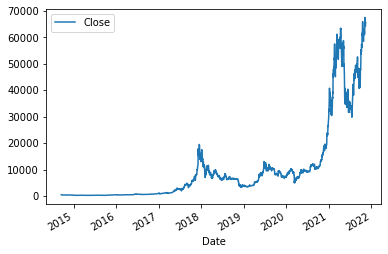

In [2]:
df = yf.Ticker('BTC-USD').history("Max")
df = pd.DataFrame(df['Close'])
df.plot()

<AxesSubplot:xlabel='Date'>

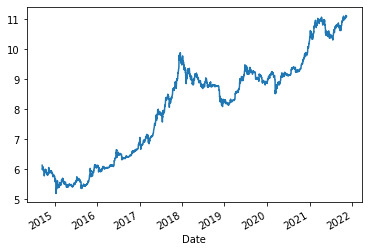

In [3]:
df['LogClose'] = np.log(df['Close'])
df['LogClose'].plot()

In [4]:
Ntest = 30
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [5]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index >train.index[-1]

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw = ExponentialSmoothing(
    train['LogClose'],
    initialization_method = 'legacy-heuristic',
    trend = 'add',seasonal = None)
res_hw = hw.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [7]:
df.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues
df.loc[test_idx,'HoltWintersTest'] = res_hw.forecast(Ntest).to_numpy()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [9]:
df.head()

,Close,LogClose,HoltWintersTrain,HoltWintersTest
Date,,,,
2014-09-17,457.334015,6.125414,6.123722,NaN
2014-09-18,424.440002,6.050771,6.127278,NaN
2014-09-19,394.795990,5.978369,6.054285,NaN
2014-09-20,408.903992,6.013480,5.981871,NaN
2014-09-21,398.821014,5.988513,6.014713,NaN


<AxesSubplot:xlabel='Date'>

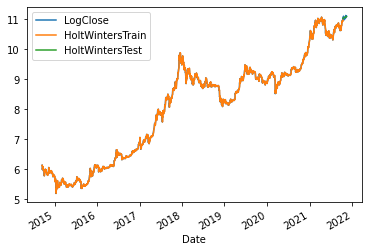

In [10]:
df[['LogClose','HoltWintersTrain','HoltWintersTest']].plot()

<AxesSubplot:xlabel='Date'>

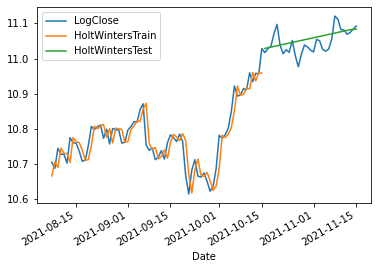

In [11]:
cols = ['LogClose','HoltWintersTrain','HoltWintersTest']
df.iloc[-100:][cols].plot()

In [12]:
df.loc[test_idx, 'Naive'] = train.iloc[-1]['LogClose']

In [13]:
df.head()

,Close,LogClose,HoltWintersTrain,HoltWintersTest,Naive
Date,,,,,
2014-09-17,457.334015,6.125414,6.123722,NaN,NaN
2014-09-18,424.440002,6.050771,6.127278,NaN,NaN
2014-09-19,394.795990,5.978369,6.054285,NaN,NaN
2014-09-20,408.903992,6.013480,5.981871,NaN,NaN
2014-09-21,398.821014,5.988513,6.014713,NaN,NaN


<AxesSubplot:xlabel='Date'>

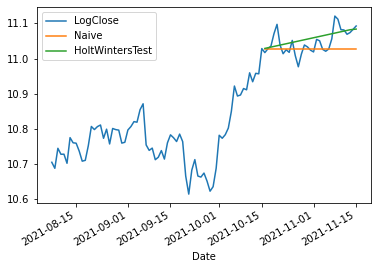

In [14]:
df.iloc[-100:][['LogClose','Naive','HoltWintersTest']].plot()

In [15]:
r2_score(df.loc[test_idx, 'LogClose'],df.loc[test_idx,'Naive'])

-0.2724990777032259

In [18]:
r2_score(df.loc[test_idx, 'LogClose'],df.loc[test_idx,'HoltWintersTest'])

0.1413147553487346